In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import stats

In [2]:
def read_file(filename):
    df = pd.read_csv(filename,sep=',',skiprows=4)
    return df
elec = read_file("API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_5995551.csv")
agri = read_file("API_AG.LND.AGRI.ZS_DS2_en_csv_v2_5995314.csv")
renew = read_file("API_EG.FEC.RNEW.ZS_DS2_en_csv_v2_5995541.csv")
land = read_file("API_AG.LND.FRST.K2_DS2_en_csv_v2_5995336.csv")
land

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,Forest area (sq. km),AG.LND.FRST.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,4.20,4.2,4.200,4.2,4.20,4.2,4.2,4.200,NaN,NaN
1,Africa Eastern and Southern,AFE,Forest area (sq. km),AG.LND.FRST.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,4671832.12,4640642.5,4607876.100,4575901.2,4544314.78,4511676.2,4479395.0,4446875.546,NaN,NaN
2,Afghanistan,AFG,Forest area (sq. km),AG.LND.FRST.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,12084.40,12084.4,12084.400,12084.4,12084.40,12084.4,12084.4,12084.400,NaN,NaN
3,Africa Western and Central,AFW,Forest area (sq. km),AG.LND.FRST.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,1838300.32,1830344.0,1822960.779,1815608.1,1807898.60,1800220.1,1792580.7,1784915.233,NaN,NaN
4,Angola,AGO,Forest area (sq. km),AG.LND.FRST.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,699377.52,693826.9,688276.200,682725.7,677175.10,671624.4,666073.8,660523.133,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Forest area (sq. km),AG.LND.FRST.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Forest area (sq. km),AG.LND.FRST.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,5490.00,5490.0,5490.000,5490.0,5490.00,5490.0,5490.0,5490.000,NaN,NaN
263,South Africa,ZAF,Forest area (sq. km),AG.LND.FRST.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,172684.90,172320.9,171956.900,171592.9,171228.90,170864.9,170500.9,170136.900,NaN,NaN
264,Zambia,ZMB,Forest area (sq. km),AG.LND.FRST.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,459432.80,457551.0,455668.000,453786.7,451904.60,450022.4,448140.3,446258.133,NaN,NaN


In [3]:
def drop_unwanted(df):
    new_df=df.drop(['Country Code','Indicator Code','Unnamed: 67'],axis=1)
    new_df=df.loc[:,['Country Name','Indicator Name','2013','2014','2015','2016','2017','2018','2019','2020','2021']]
    return new_df
new_elec = drop_unwanted(elec)
new_agri = drop_unwanted(agri)
new_renew = drop_unwanted(renew)
new_land = drop_unwanted(land)
new_elec
new_renew.iloc[1,1]


'Renewable energy consumption (% of total final energy consumption)'

In [4]:
def world_bank_data(file,sel_countries=None):
    df = file.copy()
    # Extract unique years and countries
    # Create a dataframe with years as columns
    df_years = df.copy() 
    # Create a dataframe with countries as columns
    df_countries = df.transpose()
    df_countries=df_countries.rename_axis('Year')
    
    if sel_countries is not None:
        df_years = df_years[df_years['Country Name'].isin(sel_countries)]
        df_countries.columns=df_countries.iloc[0]
        df_countries=df_countries.drop('Country Name')
        df_countries = df_countries.loc[:, sel_countries]
        
    return df_years,df_countries

sel_countries=['Africa Eastern and Southern','Africa Western and Central','Yemen, Rep.','Afghanistan','Pakistan','India','South Africa','Zimbabwe','Zambia']
years_df_elec,countries_df_elec = world_bank_data(new_elec,sel_countries)
years_df_agri,countries_df_agri = world_bank_data(new_agri,sel_countries)
years_df_renew,countries_df_renew = world_bank_data(new_renew,sel_countries)
years_df_land,countries_df_land= world_bank_data(new_land,sel_countries)
years_df_agri.set_index('Country Name',inplace=True)
years_df_renew.set_index('Country Name',inplace=True)
years_df_land.set_index('Country Name',inplace=True)
years_df_elec.set_index('Country Name',inplace=True)
years_df_elec

,Indicator Name,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,
Africa Eastern and Southern,Electric power consumption (kWh per capita),691.958090,680.149943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,Electric power consumption (kWh per capita),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa Western and Central,Electric power consumption (kWh per capita),178.422404,183.440206,NaN,NaN,NaN,NaN,NaN,NaN,NaN
India,Electric power consumption (kWh per capita),758.110675,797.349232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pakistan,Electric power consumption (kWh per capita),426.434400,419.684594,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Yemen, Rep.",Electric power consumption (kWh per capita),233.879319,204.516190,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South Africa,Electric power consumption (kWh per capita),4270.810409,4183.827490,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zambia,Electric power consumption (kWh per capita),731.934202,701.940863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zimbabwe,Electric power consumption (kWh per capita),619.235609,597.297022,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
years_df_land.describe()

,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00
mean,9.024233e+05,8.980332e+05,8.936431e+05,8.891057e+05,8.847109e+05,8.802940e+05,8.757637e+05,8.712773e+05,8.667617e+05
std,1.539805e+06,1.529671e+06,1.519540e+06,1.508995e+06,1.498669e+06,1.488456e+06,1.477926e+06,1.467515e+06,1.457035e+06
min,5.490000e+03,5.490000e+03,5.490000e+03,5.490000e+03,5.490000e+03,5.490000e+03,5.490000e+03,5.490000e+03,5.490000e+03
25%,3.997052e+04,3.964826e+04,3.932600e+04,3.868240e+04,3.849920e+04,3.808580e+04,3.767240e+04,3.725900e+04,3.684560e+04
50%,1.776707e+05,1.772100e+05,1.767493e+05,1.762886e+05,1.758279e+05,1.753672e+05,1.749065e+05,1.744458e+05,1.739851e+05
75%,7.029520e+05,7.056160e+05,7.082800e+05,7.109440e+05,7.136080e+05,7.162720e+05,7.189360e+05,7.216000e+05,7.242640e+05
max,4.703022e+06,4.671832e+06,4.640642e+06,4.607876e+06,4.575901e+06,4.544315e+06,4.511676e+06,4.479395e+06,4.446876e+06


In [6]:
years_df_agri.describe()

,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,49.838430,49.850096,49.867239,49.961536,50.027969,50.066982,49.990460,50.094056,50.045249
std,14.152514,14.145533,14.126506,14.097756,14.044513,14.030923,14.036725,14.035682,14.040563
min,31.930750,31.932095,31.933440,31.933440,32.067959,32.067959,32.067959,32.067959,32.067959
25%,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696
50%,45.848964,45.977602,46.052388,46.152439,46.271150,46.361118,46.419375,46.467608,46.485779
75%,58.123668,58.123668,58.123668,58.123668,58.123668,58.276988,58.276988,58.741548,58.741548
max,79.417850,79.417850,79.417850,79.417850,79.417850,79.417850,79.417850,79.417850,79.417850


Skewness: 0.9320333666449095
Kurtosis: 0.18196129352805812


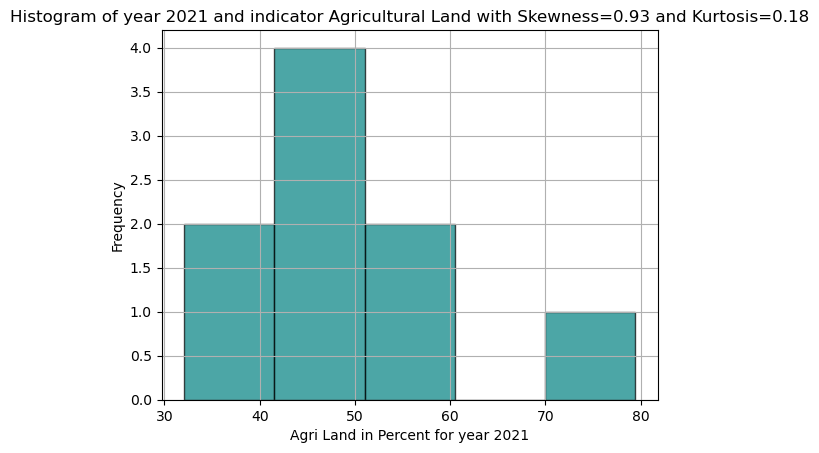

In [7]:
skew_agri = stats.skew(years_df_agri['2021'])
kurtosis_agri = stats.kurtosis(years_df_agri['2021'])
print(f"Skewness: {skew_agri}")
print(f"Kurtosis: {kurtosis_agri}")
plt.hist(years_df_agri['2021'], bins='auto', alpha=0.7, color='teal', edgecolor='black')
plt.title(f'Histogram of year {2021} and indicator Agricultural Land with Skewness={skew_agri:.2f} and Kurtosis={kurtosis_agri:.2f}')
plt.xlabel('Agri Land in Percent for year 2021')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [8]:
lc_land=new_land[['Country Name','2020']]
lc_renew=new_renew[['Country Name','2020']]
lc_agri=new_agri[['Country Name','2020']]
lc_land

,Country Name,2020
0,Aruba,4.2
1,Africa Eastern and Southern,4479395.0
2,Afghanistan,12084.4
3,Africa Western and Central,1792580.7
4,Angola,666073.8
...,...,...
261,Kosovo,NaN
262,"Yemen, Rep.",5490.0
263,South Africa,170500.9
264,Zambia,448140.3


In [9]:
all_df = pd.merge(lc_land,lc_renew,on='Country Name',suffixes=('land','renew'))
all_merged = pd.merge(all_df,lc_agri,on='Country Name',suffixes=('s','agri'))

C:\Users\HP\AppData\Local\Temp\ipykernel_1752\2054788105.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = all_merged.corr()


<Axes: >

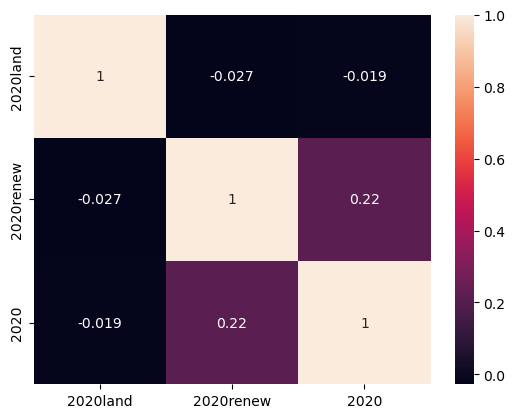

In [10]:
corr = all_merged.corr()
sns.heatmap(corr,annot= True)

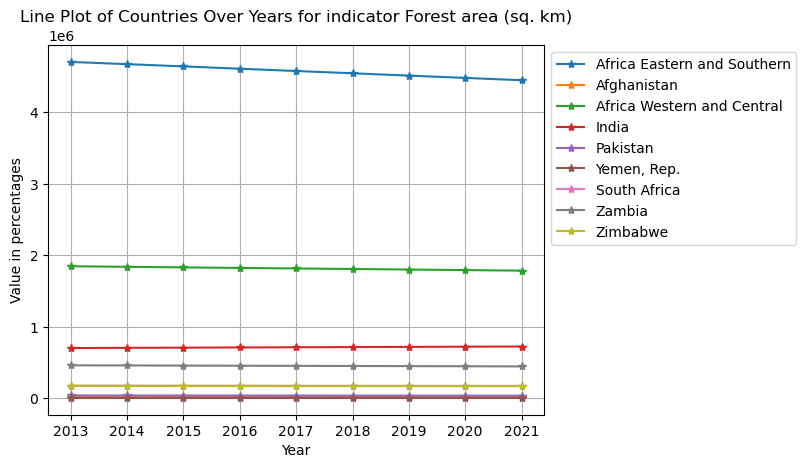

In [11]:
years_df_land = years_df_land.apply(pd.to_numeric, errors='coerce')
years_df_land = years_df_land.round(2)
for country in years_df_land.index:
    plt.plot(years_df_land.columns, years_df_land.loc[country],marker='*',label=country) 
       
plt.title('Line Plot of Countries Over Years for indicator Forest area (sq. km)')
plt.xlabel('Year')
plt.ylabel('Value in percentages')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Display legend with country names
plt.grid(True)


In [12]:
bar_new_renew=new_renew[new_renew['Country Name'].isin(['India','Pakistan','Zimbabwe','Zambia','South Africa'])]

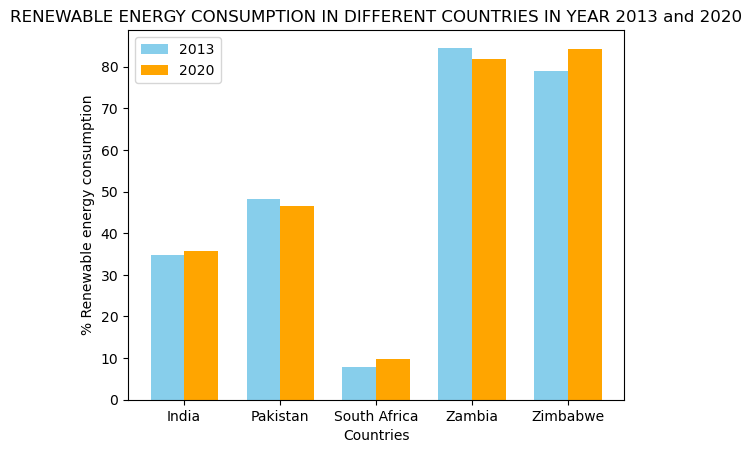

In [13]:

bar_width = 0.35
index = np.arange(len(bar_new_renew['Country Name']))
plt.bar(index - bar_width/2, bar_new_renew['2013'], width=bar_width,label='2013', color='skyblue')
plt.bar(index + bar_width/2, bar_new_renew['2020'], width=bar_width,label='2020',  color='orange')
plt.xlabel('Countries')
plt.ylabel('% Renewable energy consumption')
plt.title('RENEWABLE ENERGY CONSUMPTION IN DIFFERENT COUNTRIES IN YEAR 2013 and 2020')
plt.xticks(index, bar_new_renew['Country Name'])
plt.legend()
plt.show()

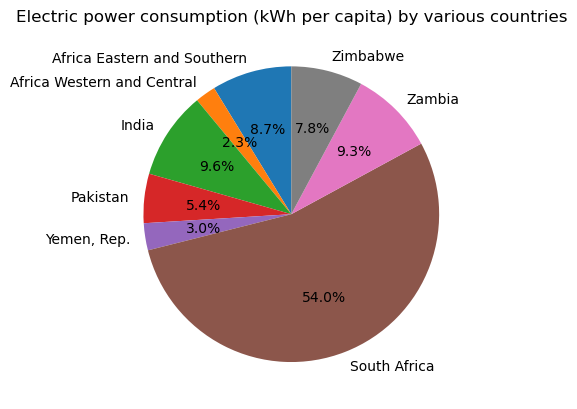

In [14]:

def pieplot():
    global years_df_elec
    # Assuming '2013' column contains numeric or convertible values
    years_df_elec['2013'] = pd.to_numeric(years_df_elec['2013'], errors='coerce')
    # Drop rows with NaN values in '2013' column
    years_df_elec = years_df_elec.dropna(subset=['2013'])
    years_df_elec.reset_index(inplace=True)
    labels=years_df_elec['Country Name']
    plt.pie(years_df_elec[str('2013')],labels=labels,autopct='%1.1f%%', startangle=90) 
    plt.title('Electric power consumption (kWh per capita) by various countries')
    plt.show()
pieplot()    

In [41]:
def scatter():
    """
    Create a scatterplot
    Parameters:
    - None
    Returns:
    - None
    shows a plot
    """
    lc_land=new_land[['2020']]
    lc_agri=new_agri[['2020']]
    plt.scatter(lc_land,lc_agri,color='green', marker='o')
    plt.xlabel('Forest Area(sq. km)')
    plt.ylabel('Agricultural Land')
    plt.title('Comparing two indicators')
    plt.show()


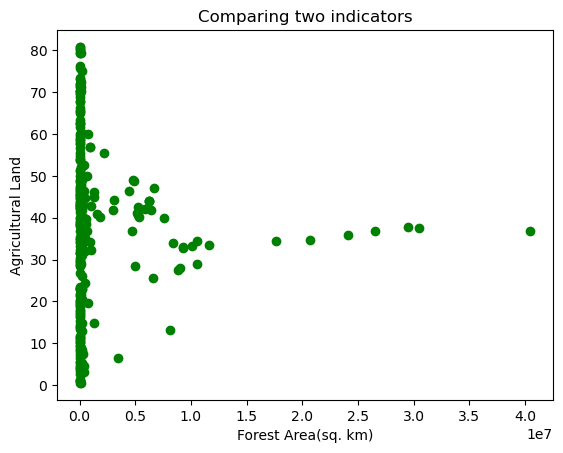

In [42]:
scatter()